In [9]:
# Basic library for data manipulation and analysis
import numpy as np
import pandas as pd

In [10]:
# load the dataset 
data = pd.read_csv('../Datagathering/Data.csv')

<Axes: xlabel='ASSD(kWh/m²/day)', ylabel='SP(kPa)'>

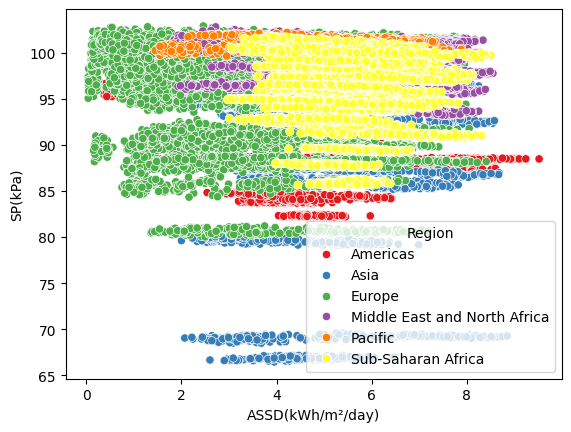

In [11]:
# visualize the relationship between the features(one graph at a time)
import seaborn as sns

sns.scatterplot(x=data['ASSD(kWh/m²/day)'], y=data['SP(kPa)'], hue=data['Region'], palette='Set1')
# sns.scatterplot(x=data['Temp(C)'], y=data['SP(kPa)'] , hue=data['Region'], palette='Set1')

In [12]:
numeric_features = data[['year ', 'month', 'ASSD(kWh/m²/day)', 'Temp(C)']]
categorical_features = data[['Region', 'Country']]

In [13]:
# Data scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Initialize the scaler and encoder
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)
numeric_features_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

ohe = OneHotEncoder(sparse_output=False)
categorical_features_encoded = ohe.fit_transform(categorical_features)
categorical_features_df = pd.DataFrame(categorical_features_encoded, columns=ohe.get_feature_names_out(categorical_features.columns))

processed_data = pd.concat([numeric_features_df, categorical_features_df], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split the data into training and testing sets
x = processed_data
y = data['SP(kPa)']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
# model training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# model evaluation
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
# cross-validation and scaler to ensure model robustness
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validated R² scores: [0.99695046 0.99844652 0.99843914 0.99524916 0.99813988]
Mean R²: 0.9974450302454676


In [17]:
import joblib
# Save the model and scaler for future use
joblib.dump(model, '../Models/SP.pkl')

['../Models/SP.pkl']

In [18]:
joblib.dump(ohe, '../models/encoder3.pkl')
joblib.dump(scaler, '../models/scaler3.pkl')

['../models/scaler3.pkl']